# Chapter 1: The Machine Learning Landscape

## 📚 Assignment Summary

This notebook serves as the submission for **Chapter 1** of the book *"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow."*

**Chapter Objective:** This chapter provides a high-level overview of Machine Learning. It answers fundamental questions:
* What is Machine Learning?
* Why is it useful?
* What are the main types of ML systems?
* What are the main challenges (bad data, bad algorithms)?
* How do you test and validate a model?

Per the assignment, this notebook will summarize these key theoretical concepts. This chapter is light on code, with only one example, which will be reproduced and explained.

## 1. What Is Machine Learning?

**Machine Learning** is the science (and art) of programming computers so they can **learn from data**.

Instead of writing explicit rules to solve a problem, you provide a large amount of data to an ML algorithm, which learns patterns and builds a *model* to solve the problem on its own.

A more engineering-oriented definition comes from Tom Mitchell:
> "A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."

For example, a **spam filter** (Task T) learns by analyzing examples of spam and non-spam emails (Experience E). Its performance (Performance P) can be measured by how accurately it classifies new, unseen emails.

### Why Use Machine Learning?

ML is a powerful tool to replace complex, hard-to-maintain, rule-based systems. It excels in several areas:

* **Problems with no traditional solution:** For many complex problems (like speech recognition), traditional rule-based approaches are unmanageable. ML algorithms can often find a solution.
* **Replacing complex rule lists:** A single ML model can often simplify and replace long lists of hand-tuned rules, performing better and being easier to maintain.
* **Adapting to new data:** ML systems can be designed to adapt to new, unseen data, making them ideal for fluctuating environments (e.g., a spam filter learning about new spam techniques).
* **Gaining insights from data:** ML can help humans discover unexpected patterns and trends in large datasets. This is known as *data mining*.

## 2. Types of Machine Learning Systems

ML systems can be categorized based on three main criteria.

### 2.1. Based on Human Supervision

This is the most common categorization, based on the type and amount of supervision the algorithm receives during training.

#### 🔹 Supervised Learning
The training data you feed to the algorithm includes the desired solutions, called **labels**. It's like learning with a teacher.

* **Classification:** The task is to predict a discrete *class* or *category*. The spam filter is a classic example (spam vs. ham).
* **Regression:** The task is to predict a continuous *numeric value*. Predicting a house price based on its features (size, location) is a regression task.

**Key Supervised Algorithms:**
* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* Support Vector Machines (SVMs)
* Decision Trees and Random Forests
* Neural Networks

#### 🔹 Unsupervised Learning
The training data is **unlabeled**. The system tries to learn patterns and structure from the data on its own, without a teacher.

* **Clustering:** The task of grouping similar instances together into *clusters* (e.g., segmenting customers based on their purchasing habits).
* **Anomaly Detection (Outlier Detection):** The task of identifying instances that deviate strongly from the norm (e.g., detecting credit card fraud).
* **Visualization & Dimensionality Reduction:** The task of simplifying complex, high-dimensional data into a lower-dimensional (e.g., 2D or 3D) representation that can be plotted and analyzed.
* **Association Rule Learning:** The task of discovering interesting relationships between attributes in large datasets (e.g., "customers who buy diapers also tend to buy beer").

#### 🔹 Semisupervised Learning
These algorithms can work with data that is **partially labeled**—typically a lot of unlabeled data and a small amount of labeled data. Google Photos, which learns to recognize faces from just one label per person, is a good example.

#### 🔹 Reinforcement Learning (RL)
This is a very different approach. The learning system, called an **agent**, observes an **environment**, selects and performs **actions**, and in return gets **rewards** or **penalties**. It must learn by itself what is the best strategy, called a **policy**, to maximize its cumulative reward over time. A self-driving car learning to drive is a good example of RL.

### 2.2. Based on Learning Method

This criterion concerns whether the system can learn incrementally from a stream of incoming data.

* **Batch Learning (Offline Learning):** The system is trained using all available data at once. It learns offline, and then is launched into production where it no longer learns. To learn from new data, it must be retrained from scratch on the full dataset.
* **Online Learning (Incremental Learning):** The system is trained incrementally by feeding it data instances sequentially, either individually or in small groups called **mini-batches**. This is great for systems that need to adapt to change rapidly (e.g., stock market prediction) or for datasets that are too large to fit in one machine's memory.

### 2.3. Based on Generalization Strategy

This category describes how the system *generalizes* to new, unseen examples.

* **Instance-Based Learning:** The system learns the training examples by heart. When given a new instance, it uses a **similarity measure** to compare it to the learned examples and makes a prediction based on the most similar ones. (e.g., k-Nearest Neighbors).
* **Model-Based Learning:** The system builds a **model** from the training data, which is a (simplified) representation of the data. This model is then used to make predictions. The code example below demonstrates this approach.

## 3. Code Reproduction: A Model-Based Learning Example

This is the only code example in Chapter 1. The book uses data on life satisfaction and GDP per capita to build a simple **Linear Regression** model. This is a classic *model-based* approach.

First, we'll set up the environment and define a helper function to download the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
import urllib.request

# Create a directory to store the data
datapath = os.path.join("datasets", "lifesat", "")
os.makedirs(datapath, exist_ok=True)

# Download the data files from the author's GitHub repo
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
oecd_bli_url = DOWNLOAD_ROOT + "datasets/lifesat/oecd_bli_2015.csv"
gdp_per_capita_url = DOWNLOAD_ROOT + "datasets/lifesat/gdp_per_capita.csv"

urllib.request.urlretrieve(oecd_bli_url, datapath + "oecd_bli_2015.csv")
urllib.request.urlretrieve(gdp_per_capita_url, datapath + "gdp_per_capita.csv")

('datasets/lifesat/gdp_per_capita.csv',
 <http.client.HTTPMessage at 0x7ce03cf1acf0>)

### Helper Function to Prepare the Data

The book mentions that the `prepare_country_stats()` function is not included in the text. As per the assignment, I am providing it here. This function merges the two data files (OECD life satisfaction and IMF GDP per capita) into a single clean Pandas DataFrame.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    """Merges OECD and IMF data, processes it, and returns a DataFrame."""
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35] # Remove specific countries
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

### Reproducing Example 1-1

Now we can reproduce the code from the book.

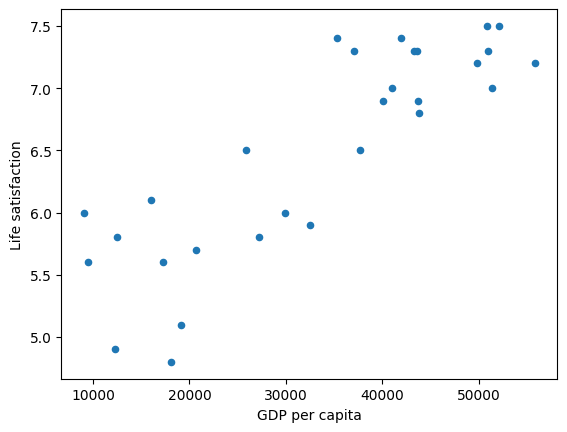

[[5.96242338]]


In [3]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]  # Predictor
y = np.c_[country_stats["Life satisfaction"]] # Target

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

### Code Explanation

This code block is a complete, albeit simple, ML project:
1.  **Load Data:** It loads two CSV files using pandas.
2.  **Prepare Data:** It uses the `prepare_country_stats` function to merge and clean the data. The result is a set of predictor variables `X` (GDP per capita) and a target variable `y` (Life satisfaction).
3.  **Visualize Data:** It creates a scatter plot, which shows a clear positive linear trend: countries with higher GDP per capita tend to have higher life satisfaction.
4.  **Select & Train Model:** It selects a `LinearRegression` model from Scikit-Learn and trains it on the `X` and `y` data using the `fit()` method.
5.  **Make Prediction:** It uses the trained model's `predict()` method to estimate the life satisfaction for a new country (Cyprus), based on its GDP per capita.

## 4. Main Challenges of Machine Learning

The chapter highlights that the two main things that can go wrong are "bad data" and "bad algorithms."

### 4.1. Bad Data (Data Problems)

* **Insufficient Quantity of Training Data:** Most ML algorithms need a lot of data to work properly. Deep Learning models, in particular, can require millions of examples.
* **Nonrepresentative Training Data:** The data used for training must be representative of the new cases you want to generalize to. If it's not, the model will be biased (e.g., training a self-driving car only on sunny days). This can be caused by:
    * *Sampling Noise:* The sample is too small, so it's nonrepresentative by chance.
    * *Sampling Bias:* The sampling method itself is flawed (e.g., polling people only by phone).
* **Poor-Quality Data:** Data full of errors, outliers, and noise will make it difficult for the model to detect underlying patterns.
* **Irrelevant Features:** The data must contain relevant features. The process of finding the best features to train on is called **feature engineering**.

### 4.2. Bad Algorithms (Algorithm Problems)

* **Overfitting the Training Data:** The model performs well on the training data, but it does not generalize well to new instances. This happens when the model is *too complex* relative to the amount and noisiness of the data. It learns the noise, not the underlying pattern.
    * **Solutions:** Simplify the model, gather more data, or reduce the noise in the data.

* **Underfitting the Training Data:** The model is *too simple* to learn the underlying structure of the data. It performs poorly even on the training data.
    * **Solutions:** Select a more powerful model, feed better features to the algorithm (feature engineering), or reduce the constraints on the model.

## 5. Testing and Validating

The only way to know how well a model will generalize to new cases is to try it out on new cases. To do this, you split your data into distinct sets:

* **Training Set:** Used to train the model (typically ~80% of the data).
* **Test Set:** Used to estimate the model's performance on new, unseen data (the *generalization error*) after the model is trained. You *never* look at or use the test set during training.
* **Validation Set (or Development Set):** When you need to tune your model's **hyperparameters** (e.g., the `k` in k-Nearest Neighbors), you can't use the test set, or you will overfit to it. A common solution is to hold out part of the training set as a validation set. You train multiple models with different hyperparameters on the (reduced) training set, evaluate them on the validation set, and select the best one.


## Chapter 1 Conclusion

This chapter provided a high-level view of the ML landscape. We've defined what ML is, explored its main categories (supervised, unsupervised, etc.), and identified the primary challenges related to data (quantity, quality, representativeness) and algorithms (overfitting, underfitting). Finally, we established the crucial importance of splitting data into training, validation, and test sets to properly train and evaluate a model.